The `OpenCV` Library contains many popular algorithms for computer vision, including object detection and tracking algorithms built-in.


# Section Goals:
- Be able to open image files with `OpenCV` in both a notebook and a python script.
- Draw simple geometries on images.
- Directly interact with an image through callbacks.

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

**WARNING!** 

Make sure to provide the correct path like we do in our notebooks! ALWAYS confirm that your file path is correct before posting a question on this.

In [3]:
img = cv2.imread('data/00-puppy.jpg')

In [4]:
type(img)

numpy.ndarray

In [5]:
wrong_img = cv2.imread('wrong_path/00-puppy.jpg')

In [6]:
type(wrong_img)

NoneType

In [7]:
img.shape

(1300, 1950, 3)

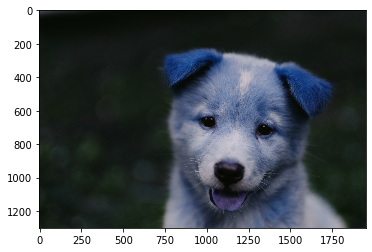

In [8]:
plt.imshow(img)

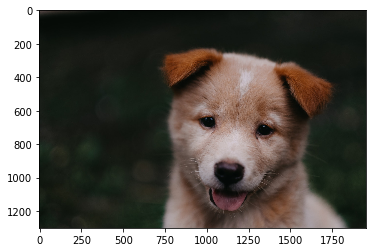

In [9]:
# Matplotlib --> RGB RED GREEN BLUE
# OpenCV --> BLUE GREEN RED
fix_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(fix_img)

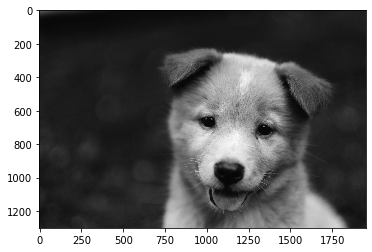

In [10]:
img_gray = cv2.imread('data/00-puppy.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray, cmap='gray')

In [11]:
img_gray.shape

(1300, 1950)

## Resize an image

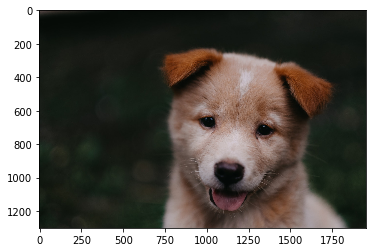

In [12]:
plt.imshow(fix_img)

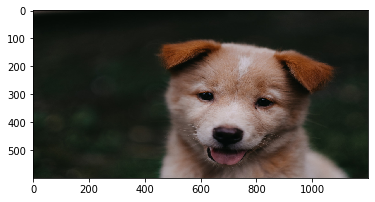

In [13]:
new_img = cv2.resize(fix_img, (1200, 600))
plt.imshow(new_img)

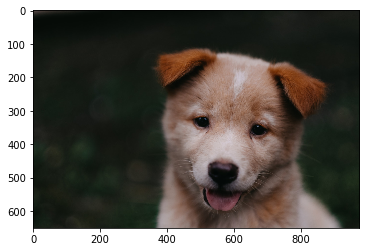

In [14]:
ratio = 0.5
new_img = cv2.resize(fix_img, (0, 0), fix_img, ratio, ratio)
plt.imshow(new_img)

In [15]:
new_img.shape

(650, 975, 3)

## Flip an image

Text(0.5, 1.0, 'Image flipped according to the horizontal and vertical axes')

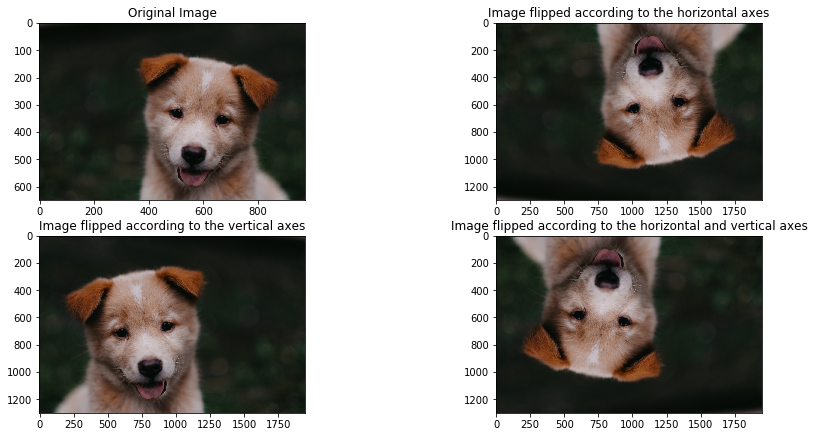

In [16]:
plt.figure(figsize=(15, 15))

plt.subplot(4, 2, 1)
# new_img = cv2.flip(fix_img, 1)
plt.imshow(new_img)
plt.title('Original Image')

plt.subplot(4, 2, 2)
new_img = cv2.flip(fix_img, 0)
plt.imshow(new_img)
plt.title('Image flipped according to the horizontal axes')

plt.subplot(4, 2, 3)
new_img = cv2.flip(fix_img, 1)
plt.imshow(new_img)
plt.title('Image flipped according to the vertical axes')

plt.subplot(4, 2, 4)
new_img = cv2.flip(fix_img, -1)
plt.imshow(new_img)
plt.title('Image flipped according to the horizontal and vertical axes')

## Saving images

In [17]:
type(new_img)

numpy.ndarray

In [18]:
cv2.imwrite('data/flipped_puppy.jpg', new_img)

True

## Opening Image files with OpenCV

Generally, opening images with OpenCV in the notebook create some problems. So for opening images and videos we are going to use python script instead of jupyter notebook.

In [19]:
# img = cv2.imread('data/00-puppy.jpg')
# cv2.imshow('Puppy', img)
# cv2.waitKey()

## Drawing on Images

In [20]:
blank_img = np.zeros(shape=(512, 512, 3), dtype=np.int16)
blank_img.shape

(512, 512, 3)

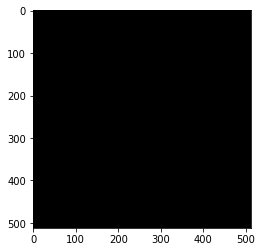

In [21]:
plt.imshow(blank_img)

-----
# Shapes
----

### Rectangles

* img Image.
* pt1 Vertex of the rectangle.
* pt2 Vertex of the rectangle opposite to pt1 .
* color Rectangle color or brightness (grayscale image).
* thickness Thickness of lines that make up the rectangle. Negative values, like #FILLED,mean that the function has to draw a filled rectangle.
* lineType Type of the line. See #LineTypes
* shift Number of fractional bits in the point coordinates.

## Rectangles

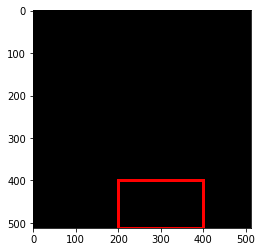

In [22]:
cv2.rectangle(blank_img, pt1=(200, 400), pt2=(400, 512), thickness=5, 
              color=(255, 0, 0))
plt.imshow(blank_img)

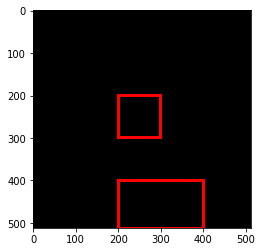

In [23]:
cv2.rectangle(blank_img, pt1=(200, 200), pt2=(300, 300), thickness=5, 
              color=(255, 0, 0))
plt.imshow(blank_img)

## Circles

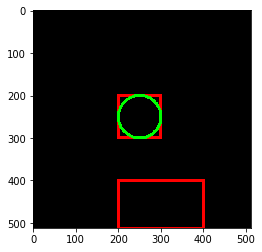

In [24]:
cv2.circle(blank_img, center=(250, 250), radius=50, color=(0, 255, 0), 
           thickness=5)
plt.imshow(blank_img)

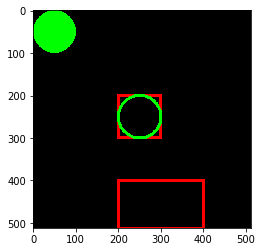

In [25]:
cv2.circle(blank_img, center=(50, 50), radius=50, color=(0, 255, 0), 
           thickness=-1)
plt.imshow(blank_img)

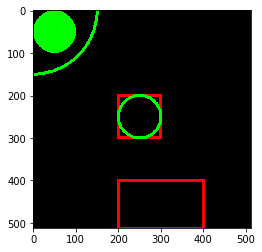

In [26]:
cv2.circle(blank_img, center=(0, 0), radius=150, color=(0, 255, 0), 
           thickness=5)
plt.imshow(blank_img)

## Lines

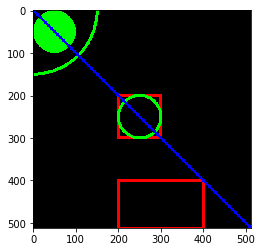

In [27]:
cv2.line(blank_img, pt1=(0, 0), pt2=(511, 511), color=(0, 0, 255), 
         thickness=5)
plt.imshow(blank_img)

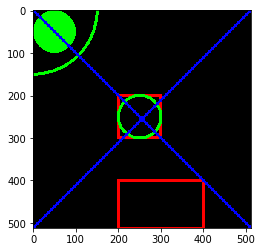

In [28]:
cv2.line(blank_img, pt1=(511, 0), pt2=(0, 511), color=(0, 0, 255), 
         thickness=5)
plt.imshow(blank_img)

# Text

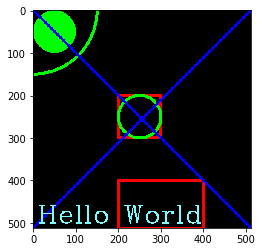

In [29]:
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(blank_img, text='Hello World', org=(10, 500), 
            fontFace=font, fontScale=2, color=(122, 255, 255),
            thickness=2, lineType=cv2.LINE_AA)
plt.imshow(blank_img)

# Polygons

To draw a polygon, first you need the coordinates of vertices. Make those points into an array of shape `ROWSx1x2` where ROWS are number of vertices and it should be of type `int32`

In [42]:
blank_img = np.zeros(shape=(512, 512, 3), dtype=np.int32)

In [72]:
vertices = np.array([[100, 300], 
                     [200, 200], 
                     [500, 300]], 
                     np.int32)
pts = vertices.reshape((-1, 1, 2))
pts

array([[[100, 300]],

       [[200, 200]],

       [[500, 300]]], dtype=int32)

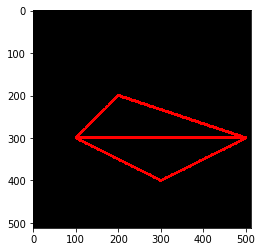

In [73]:
cv2.polylines(blank_img, [pts], isClosed=True, 
              color=(255, 0, 0), thickness=5)
plt.imshow(blank_img)

# Drawing with your mouse

In [45]:
def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img, (x, y), 100, (0, 255, 0), -1)
    elif event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(img, (x, y), 50, (255, 0, 0), -1)


cv2.namedWindow(winname='my_drawing')
cv2.setMouseCallback('my_drawing', draw_circle)

 # Showing image with OpenCV
img = np.zeros((512, 512, 3), np.int8)

while True:
    cv2.imshow('my_drawing', img)
    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyAllWindows()

In [48]:
# True while mouse button down, False while mouse button UP
drawing = False
ix, iy = -1, -1

def draw_rectangle(event, x, y, flags, param):
    global ix, iy, drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), -1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), -1)
        


cv2.namedWindow(winname='my_drawing')
cv2.setMouseCallback('my_drawing', draw_rectangle)

 # Showing image with OpenCV
img = np.zeros((512, 512, 3), np.int8)

while True:
    cv2.imshow('my_drawing', img)
    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyAllWindows()

# Image Basics with OpenCV Assessment

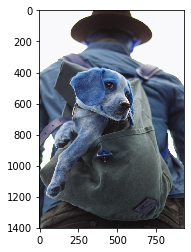

In [76]:
dog = cv2.imread('data/dog_backpack.jpg')
plt.imshow(dog)

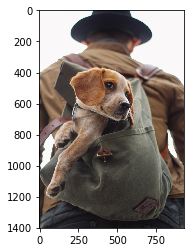

In [77]:
dog = cv2.cvtColor(dog, cv2.COLOR_RGB2BGR)
plt.imshow(dog)

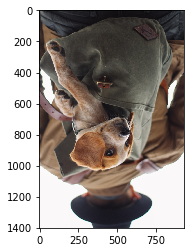

In [78]:
plt.imshow(cv2.flip(dog, 0))

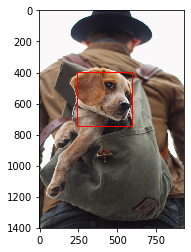

In [79]:
cv2.rectangle(dog, (250, 400), (600, 750), color=(255, 0, 0), thickness=5)
plt.imshow(dog)

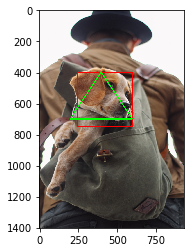

In [80]:
vertices = np.array([[200, 700], 
                     [400, 400], 
                     [600, 700]], 
                     np.int32)
pts = vertices.reshape((-1, 1, 2))

cv2.polylines(dog, [pts], isClosed=True, color=(0, 255, 0), thickness=5)
plt.imshow(dog)

In [82]:
def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(dog, (x, y), 50, (0, 0, 255), 5)


cv2.namedWindow(winname='my_drawing')
cv2.setMouseCallback('my_drawing', draw_circle)

 # Showing image with OpenCV
img = np.zeros((512, 512, 3), np.int8)

while True:
    cv2.imshow('my_drawing', dog)
    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyAllWindows()